# 토마토 생산량과 기후요인 분석

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [219]:
df=pd.read_csv("농업기상관측.csv",encoding="cp949")

In [220]:
df

,지역,평균 : 1.5M 평균 습도(%),평균 : 10CM 일 토양수분(%),평균 : 20CM 일 토양수분(%),평균 : 30CM 일 토양수분(%),평균 : 50CM 일 토양수분(%),평균 : 1.5M 평균 기온(°C),평균 : 평균 지면온도(°C),평균 : 5CM 평균 지중온도(°C),평균 : 30CM 평균 지중온도(°C),평균 : 0.5M 일 지중온도(°C),평균 : 1.0M 일 지중온도(°C),최저기온(°C),최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),일조율(%),평균 풍속(m/s),합계 : 10a당 생산량 (kg)
0,경기북부,73.4,19.5,32.6,36.2,36.6,16.8,18.1,18.0,18.0,19.0,19.4,-21.7,35.1,1037.9,100.0,76.3,55.8,1.4,20806
1,인천광역시,73.2,11.3,16.2,15.8,10.5,13.7,14.9,16.3,16.7,16.9,14.3,-16.2,34.7,960.9,82.7,62.0,57.8,2.4,34010
2,전라남도,76.3,45.5,37.6,41.4,33.7,16.4,17.3,19.3,18.5,19.8,19.8,-19.7,35.8,1207.3,93.4,73.7,54.5,2.0,30259
3,충청남도,73.6,9.1,17.3,24.9,32.6,13.2,15.5,15.2,15.1,15.1,15.2,-18.6,36.3,1084.4,70.9,72.0,54.7,1.9,33270
4,경기남부,72.1,2.4,20.9,23.4,26.4,13.4,14.3,13.9,14.0,13.8,14.5,-15.8,36.0,974.0,65.3,66.8,54.2,1.6,20806
5,경상북도,73.2,20.3,5.4,11.0,17.6,12.6,14.3,14.9,15.2,14.8,15.2,-20.7,34.0,1162.2,63.7,73.9,49.2,1.2,31885
6,충청북도,77.0,24.3,25.1,25.7,26.3,13.0,15.0,15.6,15.2,15.1,15.2,-16.5,36.3,1496.6,88.7,68.4,51.1,1.6,31791
7,전라북도,75.7,23.0,30.7,31.1,31.2,13.9,15.4,14.9,15.1,15.0,14.6,-22.4,35.7,1115.3,79.4,78.7,59.9,1.3,32482
8,강원북부,72.7,11.5,13.5,10.9,12.7,10.7,12.6,11.6,11.3,10.9,10.4,-21.9,36.6,1045.9,69.7,69.6,51.7,1.4,28295
9,강원남부,72.1,14.7,11.2,4.4,12.8,11.8,14.0,14.4,14.6,14.3,14.6,-11.9,35.1,1708.3,279.2,73.9,52.8,3.0,28295


In [203]:
df.columns

Index(['지역', '평균 : 1.5M 평균 습도(%)', '평균 : 10CM 일 토양수분(%)',
       '평균 : 20CM 일 토양수분(%)', '평균 : 30CM 일 토양수분(%)', '평균 : 50CM 일 토양수분(%)',
       '평균 : 1.5M 평균 기온(°C)', '평균 : 평균 지면온도(°C)', '평균 : 5CM 평균 지중온도(°C)',
       '평균 : 30CM 평균 지중온도(°C)', '평균 : 0.5M 일 지중온도(°C)', '평균 : 1.0M 일 지중온도(°C)',
       '최저기온(°C)', '최고기온(°C)', '합계 강수량(mm)', '일 최다 강수량(mm)', '평균 상대습도(%)',
       '일조율(%)', '평균 풍속(m/s)', '합계 : 10a당 생산량 (kg)'],
      dtype='object')

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   지역                     10 non-null     object 
 1   평균 : 1.5M 평균 습도(%)     10 non-null     float64
 2   평균 : 10CM 일 토양수분(%)    10 non-null     float64
 3   평균 : 20CM 일 토양수분(%)    10 non-null     float64
 4   평균 : 30CM 일 토양수분(%)    10 non-null     float64
 5   평균 : 50CM 일 토양수분(%)    10 non-null     float64
 6   평균 : 1.5M 평균 기온(°C)    10 non-null     float64
 7   평균 : 평균 지면온도(°C)       10 non-null     float64
 8   평균 : 5CM 평균 지중온도(°C)   10 non-null     float64
 9   평균 : 30CM 평균 지중온도(°C)  10 non-null     float64
 10  평균 : 0.5M 일 지중온도(°C)   10 non-null     float64
 11  평균 : 1.0M 일 지중온도(°C)   10 non-null     float64
 12  최저기온(°C)               10 non-null     float64
 13  최고기온(°C)               10 non-null     float64
 14  합계 강수량(mm)             10 non-null     float64
 15  일 최다 강수량(

In [234]:
df.describe()

,평균 : 1.5M 평균 습도(%),평균 : 10CM 일 토양수분(%),평균 : 20CM 일 토양수분(%),평균 : 30CM 일 토양수분(%),평균 : 50CM 일 토양수분(%),평균 : 1.5M 평균 기온(°C),평균 : 평균 지면온도(°C),평균 : 5CM 평균 지중온도(°C),평균 : 30CM 평균 지중온도(°C),평균 : 0.5M 일 지중온도(°C),평균 : 1.0M 일 지중온도(°C),최저기온(°C),최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),일조율(%),평균 풍속(m/s),합계 : 10a당 생산량 (kg)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,73.930000,18.160000,21.050000,22.480000,24.040000,13.550000,15.140000,15.41000,15.370000,15.470000,15.320000,-18.54000,35.560000,1179.280000,99.300000,71.53000,54.170000,1.780000,29189.900000
std,1.758819,11.779568,10.292311,11.902269,9.809429,1.866815,1.593877,2.13565,2.047247,2.565606,2.660743,3.38992,0.819485,240.909129,64.368143,4.91077,3.182609,0.563323,4808.233828
min,72.100000,2.400000,5.400000,4.400000,10.500000,10.700000,12.600000,11.60000,11.300000,10.900000,10.400000,-22.40000,34.000000,960.900000,63.700000,62.00000,49.200000,1.200000,20806.000000
25%,72.825000,11.350000,14.175000,12.200000,14.000000,12.700000,14.300000,14.52500,14.725000,14.425000,14.525000,-21.45000,35.100000,1039.900000,70.000000,68.70000,51.975000,1.400000,28295.000000
50%,73.300000,17.100000,19.100000,24.150000,26.350000,13.300000,14.950000,15.05000,15.150000,15.050000,14.900000,-19.15000,35.750000,1099.850000,81.050000,72.85000,54.350000,1.600000,31025.000000
75%,75.175000,22.325000,29.300000,29.750000,32.250000,13.850000,15.475000,16.12500,16.325000,16.450000,15.200000,-16.27500,36.225000,1196.025000,92.225000,73.90000,55.525000,1.975000,32332.750000
max,77.000000,45.500000,37.600000,41.400000,36.600000,16.800000,18.100000,19.30000,18.500000,19.800000,19.800000,-11.90000,36.600000,1708.300000,279.200000,78.70000,59.900000,3.000000,34010.000000


In [204]:
df.columns=["지역","1.5M_humidity","10cm_soil_moisture","20cm_soil_moisture",
"30cm_soil_moisture","50cm_soil_moisture","atmosphere_temp","ground_temp","5cm_soil_temp",
"30cm_soil_temp","50cm_soil_temp","1M_soil_temp","lowest_temp","highest_temp",
"precipitation","max_precipitation","rltv_humidity","sunshine","wind_speed","10a_production"]

In [235]:
df=df.drop("지역",axis=1)
df

,평균 : 1.5M 평균 습도(%),평균 : 10CM 일 토양수분(%),평균 : 20CM 일 토양수분(%),평균 : 30CM 일 토양수분(%),평균 : 50CM 일 토양수분(%),평균 : 1.5M 평균 기온(°C),평균 : 평균 지면온도(°C),평균 : 5CM 평균 지중온도(°C),평균 : 30CM 평균 지중온도(°C),평균 : 0.5M 일 지중온도(°C),평균 : 1.0M 일 지중온도(°C),최저기온(°C),최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),일조율(%),평균 풍속(m/s),합계 : 10a당 생산량 (kg)
0,73.4,19.5,32.6,36.2,36.6,16.8,18.1,18.0,18.0,19.0,19.4,-21.7,35.1,1037.9,100.0,76.3,55.8,1.4,20806
1,73.2,11.3,16.2,15.8,10.5,13.7,14.9,16.3,16.7,16.9,14.3,-16.2,34.7,960.9,82.7,62.0,57.8,2.4,34010
2,76.3,45.5,37.6,41.4,33.7,16.4,17.3,19.3,18.5,19.8,19.8,-19.7,35.8,1207.3,93.4,73.7,54.5,2.0,30259
3,73.6,9.1,17.3,24.9,32.6,13.2,15.5,15.2,15.1,15.1,15.2,-18.6,36.3,1084.4,70.9,72.0,54.7,1.9,33270
4,72.1,2.4,20.9,23.4,26.4,13.4,14.3,13.9,14.0,13.8,14.5,-15.8,36.0,974.0,65.3,66.8,54.2,1.6,20806
5,73.2,20.3,5.4,11.0,17.6,12.6,14.3,14.9,15.2,14.8,15.2,-20.7,34.0,1162.2,63.7,73.9,49.2,1.2,31885
6,77.0,24.3,25.1,25.7,26.3,13.0,15.0,15.6,15.2,15.1,15.2,-16.5,36.3,1496.6,88.7,68.4,51.1,1.6,31791
7,75.7,23.0,30.7,31.1,31.2,13.9,15.4,14.9,15.1,15.0,14.6,-22.4,35.7,1115.3,79.4,78.7,59.9,1.3,32482
8,72.7,11.5,13.5,10.9,12.7,10.7,12.6,11.6,11.3,10.9,10.4,-21.9,36.6,1045.9,69.7,69.6,51.7,1.4,28295
9,72.1,14.7,11.2,4.4,12.8,11.8,14.0,14.4,14.6,14.3,14.6,-11.9,35.1,1708.3,279.2,73.9,52.8,3.0,28295


In [236]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled= pd.DataFrame(df_scaled,columns=df.columns)

c:\Users\JK\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
c:\Users\JK\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
c:\Users\JK\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.draw()
c:\Users\JK\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
c:\Users\JK\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
c:\Users\JK\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
c:\Users\JK\anaconda3\lib\site-packages\seab

<AxesSubplot:>

c:\Users\JK\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JK\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JK\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JK\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JK\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JK\anaconda3\lib\site-packag

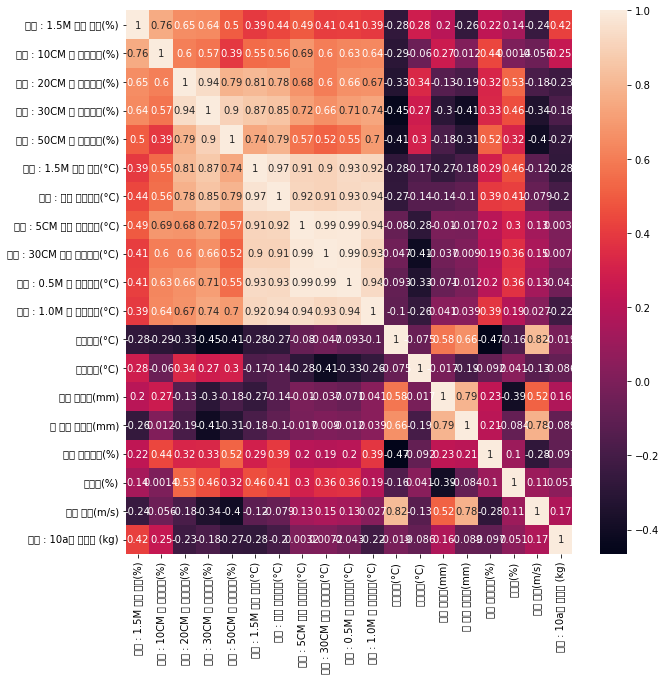

In [237]:
plt.figure(figsize=(10,10))
sns.heatmap(df_scaled.corr(), annot=True)

In [238]:
df_scaled.corr()["10a_production"].sort_values() 

KeyError: '10a_production'

### 선형 상관성이 낮게 나오는 것으로 보아 일반 선형회귀로는 좋은 결과를 얻기 힘들어보인다.
### 따라서 polynomial regression을 진행하겠다.

In [241]:
X=df.iloc[:,:-1] #10a_production 제외
y=df.iloc[:,-1] #10a_production

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, results, test_size = 0.3, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)

In [211]:
df=pd.read_csv("clean_tomato.csv",encoding="cp949")

In [212]:
df.head()

,수집일,외부온도,외부습도,외부 일사량,외부풍향,외부풍속,외부강우,강우감지,내부온도,내부습도,...,생장길이,화방높이,줄기직경,엽장,엽폭,엽수,개화군,착과군,열매수,최종화방차수
0,2021-01-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df.shape

(3529, 28)

In [214]:
df.isnull().sum()

수집일          0
외부온도       470
외부습도       470
외부 일사량    3529
외부풍향      3529
외부풍속      3529
외부강우         1
강우감지      3529
내부온도       522
내부습도       519
내부CO2     3529
내부 일사량    3529
토양EC       470
토양PH      3529
지온         470
지습         470
조사일       3072
주차        3072
생장길이      3409
화방높이      3097
줄기직경      3072
엽장        3072
엽폭        3072
엽수        3121
개화군       3097
착과군       3097
열매수       3096
최종화방차수    3193
dtype: int64